In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Лист 1: Binary Classification

In [31]:

# Прочитали данные
df = pd.read_excel('/Users/evgenijselisev/Desktop/ПЗ.Метрики Селищев Евгений.xlsx', sheet_name='Binary Classification')
df

,model,part,Y_true,Y_pred_proba_1,Y_pred_proba_0,Y_pred
0,GradientBoosting,train,0,0.12,0.88,0
1,DecisionTree,train,1,0.73,0.27,1
2,DecisionTree,test,0,0.63,0.37,1
3,GradientBoosting,test,0,0.83,0.17,1
4,DecisionTree,test,0,0.70,0.30,1
...,...,...,...,...,...,...
5195,DecisionTree,test,1,0.76,0.24,1
5196,DecisionTree,train,1,0.09,0.91,0
5197,DecisionTree,test,1,0.61,0.39,1
5198,DecisionTree,test,0,0.04,0.96,0


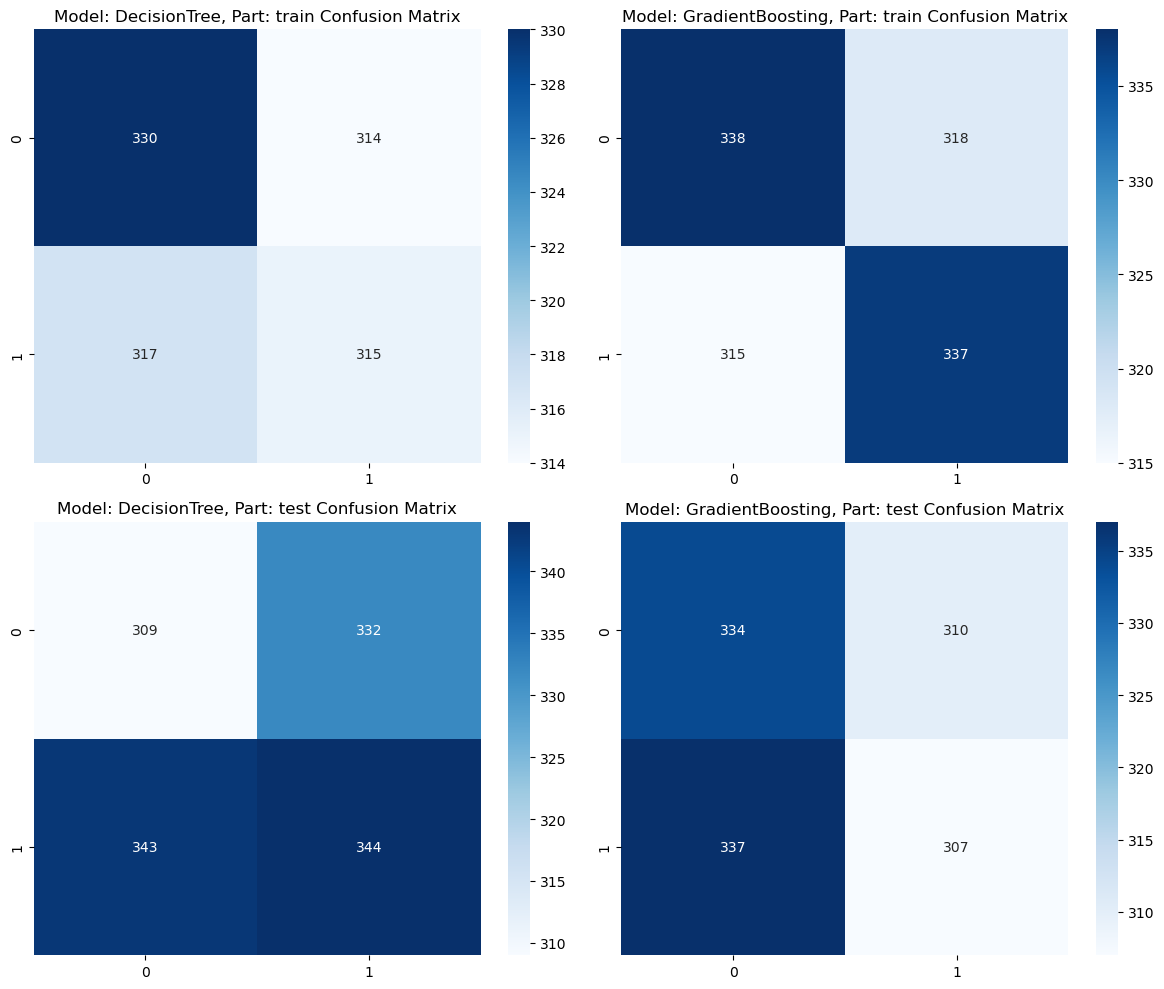

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Группируем данные по модели и выборке
grouped = df.groupby(['model', 'part'])


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Итерируем по группам
for (model, part), group in grouped:
    y_true = group['Y_true']
    y_pred = group['Y_pred']
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    
    # Определяем положение графика в сетке
    if 'train' in part:
        row = 0
    else:
        row = 1
        
    if 'DecisionTree' in model:
        col = 0
    else:
        col = 1
    

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[row, col])
    axes[row, col].set_title(f'Model: {model}, Part: {part} Confusion Matrix')


plt.tight_layout()


plt.show()


In [33]:

# Создаем пустой список для хранения метрик
metrics = []

# Переберем модели и выборки
for (model, part), group in grouped:
    y_true = group['Y_true']
    y_pred = group['Y_pred']
    
    # Рассчитываем метрики
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metrics.append({
        'Model': model,
        'Part': part,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })


metrics_df = pd.DataFrame(metrics)

metrics_df


,Model,Part,Accuracy,Precision,Recall,F1
0,DecisionTree,test,0.491717,0.508876,0.500728,0.504769
1,DecisionTree,train,0.505486,0.500795,0.498418,0.499603
2,GradientBoosting,test,0.497671,0.497569,0.476708,0.486915
3,GradientBoosting,train,0.516055,0.514504,0.516871,0.515685


* Accuracy (Точность) - показывает долю правильных предсказаний среди всех предсказаний. Высокая точность хороша, если классы сбалансированы.
* Precision (Точность) - показывает долю правильно предсказанных положительных классов среди всех положительных предсказаний. Это важно, если важно избегать ложных срабатываний.
* Recall (Полнота) - показывает долю правильно предсказанных положительных классов среди всех реальных положительных классов. Это важно, если важно избегать пропусков положительных случаев.
* F1-Score (F1-мера) - среднее гармоническое между точностью и полнотой. Эта метрика хороша для баланса между точностью и полнотой.

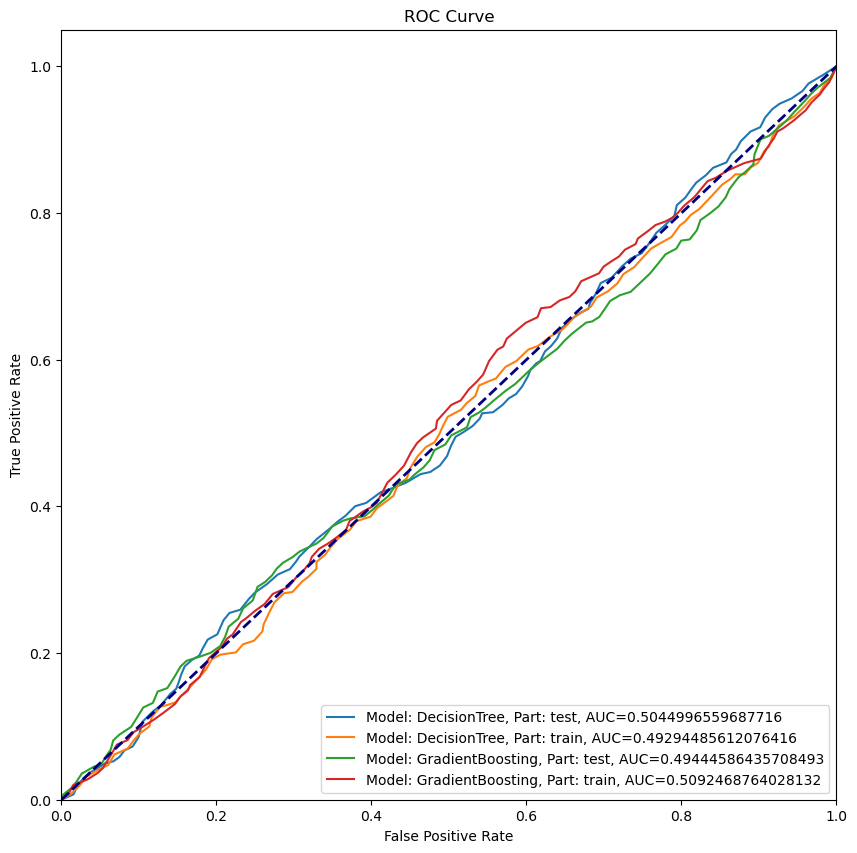

In [34]:

# Построим ROC-кривую для каждой модели по каждой выборке
plt.figure(figsize=(10, 10))

for (model, part), group in grouped:
    y_true = group['Y_true']
    y_pred_proba_1 = group['Y_pred_proba_1']
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba_1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Model: {model}, Part: {part}, AUC={roc_auc}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Выводы

* DecisionTree и GradientBoosting - две модели, используемые для решения задачи, и они демонстрируют различные характеристики на тестовых и тренировочных данных.

* Модель DecisionTree на тестовых данных имеет точность (Accuracy) около 49.17%, что означает, что примерно половина примеров классифицирована верно. Precision (точность) и Recall (полнота) также близки, что говорит о том, что модель не сильно склонна к ложным срабатываниям или пропускам.

* Модель GradientBoosting на тестовых данных имеет чуть более высокую точность (Accuracy) - около 49.77%, что немного лучше, чем у DecisionTree. Однако, стоит отметить, что и у нее также сбалансированные значения Precision и Recall.
 
* На тренировочных данных модель DecisionTree показывает точность около 50.55%, а GradientBoosting - около 51.61%. При этом, у GradientBoosting на тренировочных данных значения Precision и Recall более близки друг к другу, что может указывать на более устойчивую работу модели.

# Лист 2: Regression

In [35]:


# Прочитали данные
df_regression = pd.read_excel('/Users/evgenijselisev/Desktop/ПЗ.Метрики Селищев Евгений.xlsx', sheet_name='Regression')

df_regression



,model,part,Y_true,Y_pred
0,LinReg,train,1183,1208
1,Polynominal Reg,train,1493,1526
2,Polynominal Reg,train,1885,1876
3,LinReg,train,1052,1038
4,Polynominal Reg,test,1557,1546
...,...,...,...,...
5195,LinReg,test,669,656
5196,Polynominal Reg,train,1409,1395
5197,LinReg,test,813,817
5198,LinReg,train,1710,1726


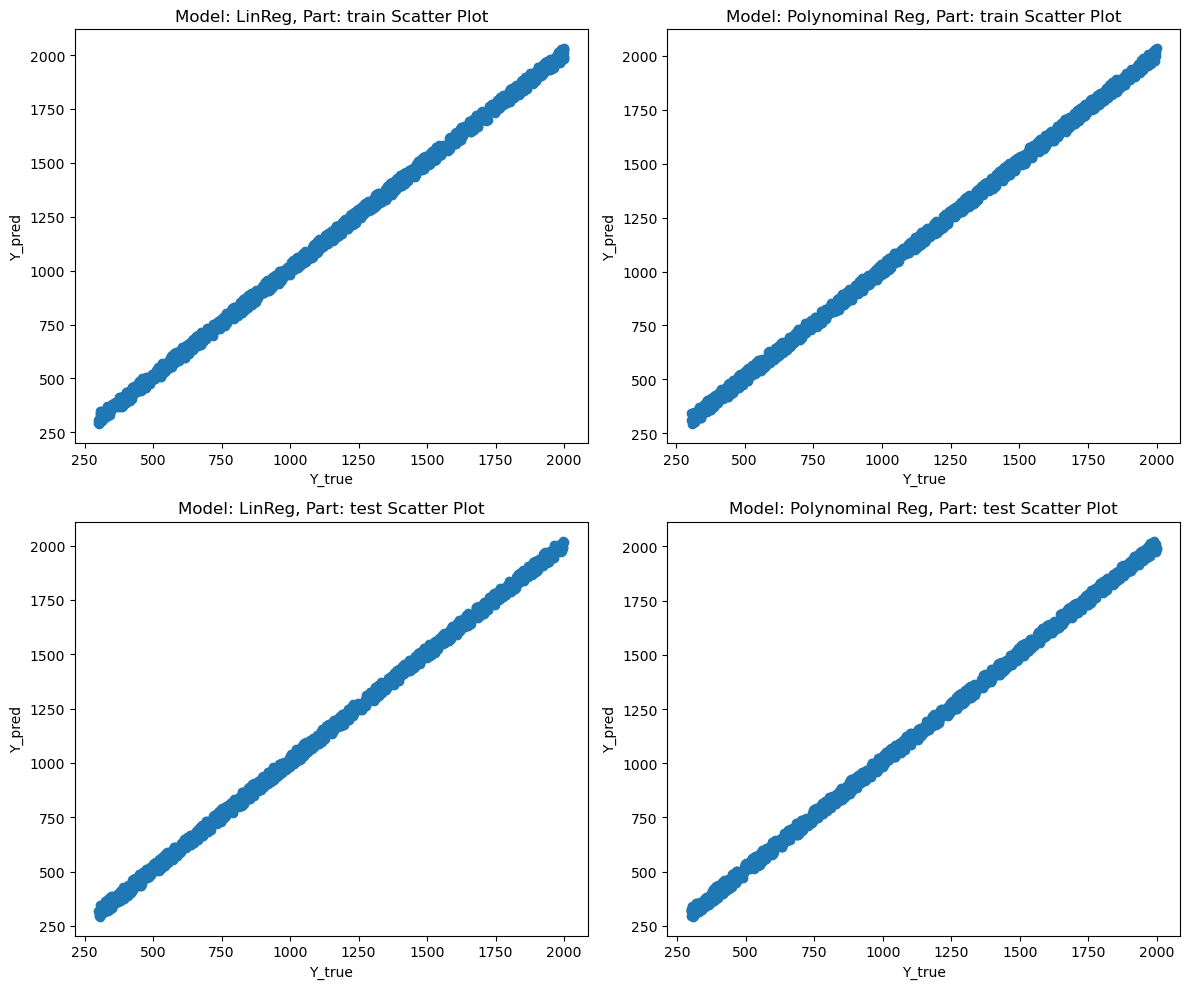

In [36]:
# Группирум данных по модели и выборке
grouped_regression = df_regression.groupby(['model', 'part'])

# Создать сетку графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Итерировать по группам
for (model, part), group in grouped_regression:
    y_true = group['Y_true']
    y_pred = group['Y_pred']
    
    # Определить положение графика в сетке
    if 'train' in part:
        row = 0
    else:
        row = 1
        
    if 'LinReg' in model:
        col = 0
    else:
        col = 1
    
    axes[row, col].scatter(y_true, y_pred)
    axes[row, col].set_title(f'Model: {model}, Part: {part} Scatter Plot')
    axes[row, col].set_xlabel('Y_true')
    axes[row, col].set_ylabel('Y_pred')

plt.tight_layout()


plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Создать пустой список для хранения метрик
metrics_regression = []

# Перебрать модели и выборки
for (model, part), group in grouped_regression:
    y_true = group['Y_true']
    y_pred = group['Y_pred']
    
    # Рассчитать метрики
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    metrics_regression.append({
        'Model': model,
        'Part': part,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    })

# Преобразовать в DataFrame
metrics_regression_df = pd.DataFrame(metrics_regression)

metrics_regression_df


,Model,Part,MAE,MSE,RMSE,R^2
0,LinReg,test,16.977467,413.644134,20.338243,0.998286
1,LinReg,train,16.961479,420.637904,20.509459,0.998227
2,Polynominal Reg,test,16.960245,414.363914,20.355931,0.998324
3,Polynominal Reg,train,17.160673,423.752869,20.585259,0.998267


* AE (Mean Absolute Error): MAE представляет собой среднее абсолютное значение разности между предсказанными и реальными значениями. Меньшие значения MAE указывают на более точные прогнозы.
* MSE (Mean Squared Error): MSE представляет собой среднее квадратичное значение разности между предсказанными и реальными значениями. MSE штрафует большие ошибки сильнее, чем MAE.
* RMSE (Root Mean Squared Error): RMSE является квадратным корнем из MSE и представляет собой среднее абсолютное значение разности между предсказанными и реальными значениями, с учетом весов квадратичной разницы. Как и MSE, RMSE также штрафует большие ошибки сильнее.
* R^2 (Coefficient of Determination): R-квадрат измеряет долю дисперсии зависимой переменной, которая объясняется моделью. Значение R-квадрат ближе к 1 указывает на лучшую подгонку модели к данным.

# Из предоставленных метрик, можно сделать следующие наблюдения:

LinReg на тестовой выборке имеет немного меньшее значение MAE (16.98) по сравнению с Polynominal Reg на тестовой выборке (16.96). Это указывает на то, что LinReg на тестовой выборке делает немного более точные прогнозы.
MSE для всех моделей и выборок сравнимы, однако LinReg на тестовой выборке имеет немного меньшее значение (413.64) по сравнению с Polynominal Reg на тестовой выборке (414.36).
RMSE также сравнимы для всех моделей и выборок, но аналогично MAE, LinReg на тестовой выборке имеет немного более низкое значение (20.34) по сравнению с Polynominal Reg на тестовой выборке (20.36).
R^2 близки к 1 для всех моделей и выборок, что свидетельствует о хорошей подгонке моделей к данным.
С учетом этих результатов исходя из представленных метрик, можно сказать, что LinReg на тестовой выборке имеет небольшое преимущество перед Polynominal Reg на тестовой выборке.